<a href="https://colab.research.google.com/github/joanizba/Aguacate-IA/blob/dev_joan/Gr%C3%A1ficos_para_Visualizaci%C3%B3n_de_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
data = pd.read_csv('avocado.csv')
df = pd.DataFrame(data)
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


<ipython-input-94-3fee26c4b638>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


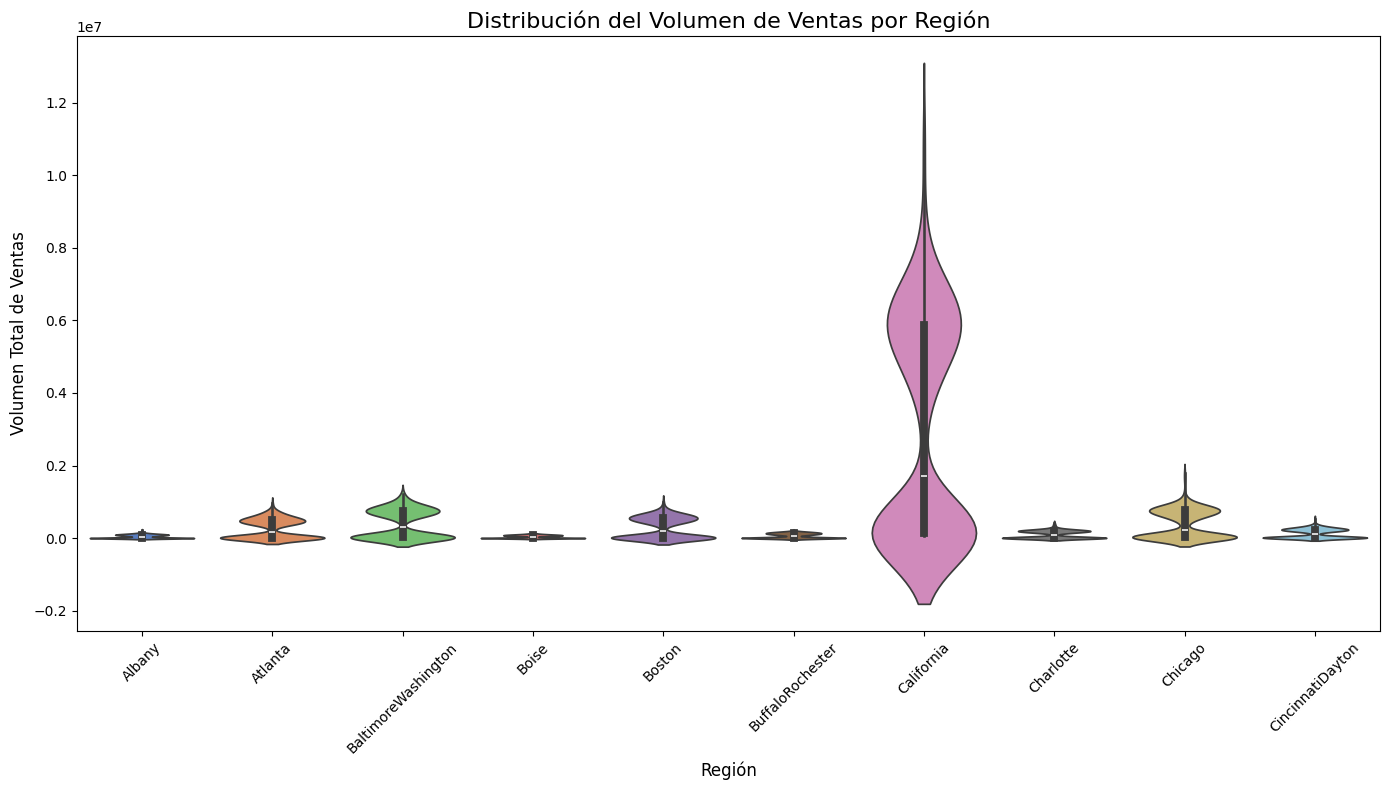

In [94]:
region_volume_avg = df.groupby('region')['Total Volume'].sum().reset_index()
region_volume_avg.columns = ['region', 'avg_total_volume']

# Crear una nueva columna para segmentación (basada en los cuartiles)
region_volume_avg['segment'] = pd.qcut(
    region_volume_avg['avg_total_volume'],
    q=4,  # Dividimos en 4 cuartiles
    labels=['Bajo', 'Medio', 'Alto', 'Muy Alto']
)

# Agregar la segmentación al DataFrame original
df = df.merge(region_volume_avg[['region', 'segment']], on='region', how='left')


top_regions = df['region'].unique()[:10]  # Obtener las primeras 10 regiones únicas
df_top = df[df['region'].isin(top_regions)]

plt.figure(figsize=(14, 8))
sns.violinplot(
    data=df_top,
    x='region',
    y='Total Volume',
    palette='muted'
)
plt.title('Distribución del Volumen de Ventas por Región', fontsize=16)
plt.xlabel('Región', fontsize=12)
plt.ylabel('Volumen Total de Ventas', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()


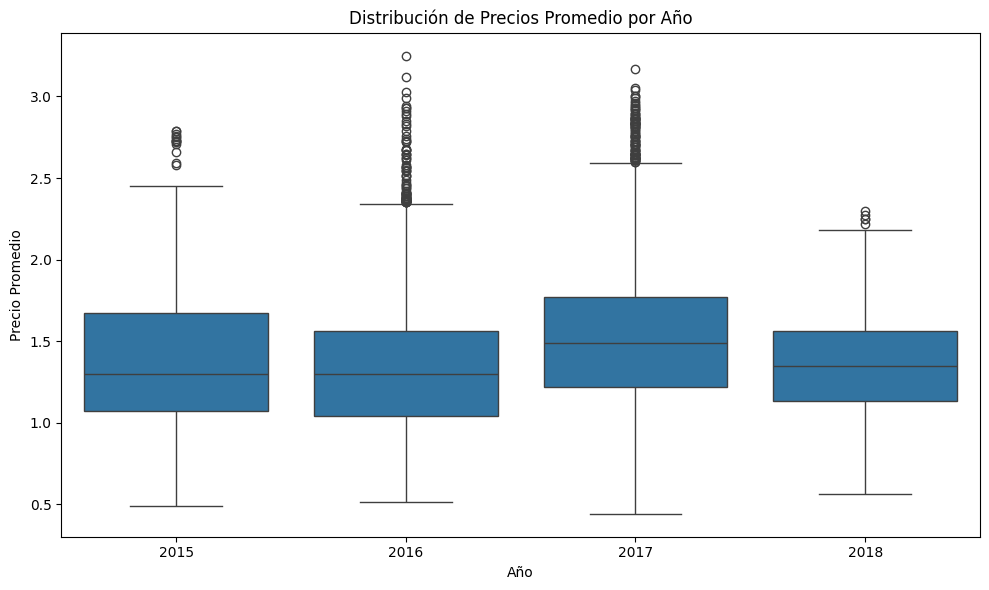

In [93]:
df['year'] = pd.to_datetime(df['Date']).dt.year

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='year', y='AveragePrice')
plt.title('Distribución de Precios Promedio por Año')
plt.xlabel('Año')
plt.ylabel('Precio Promedio')
plt.tight_layout()
plt.show()

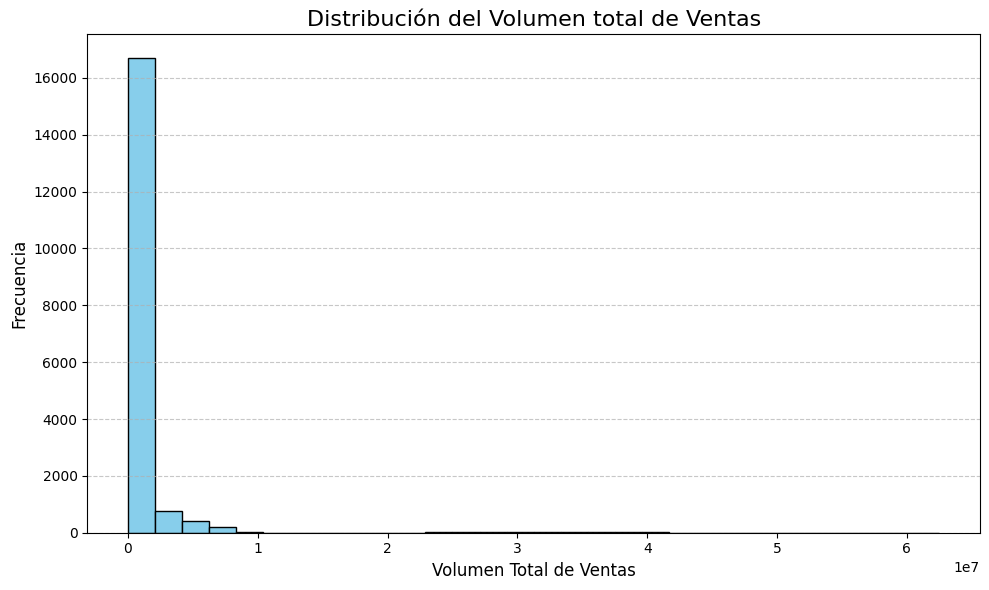

In [97]:
plt.figure(figsize=(10,6))
plt.hist(df['Total Volume'],bins=30, color="skyblue", edgecolor="black")
plt.title('Distribución del Volumen total de Ventas', fontsize=16)
plt.xlabel('Volumen Total de Ventas', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

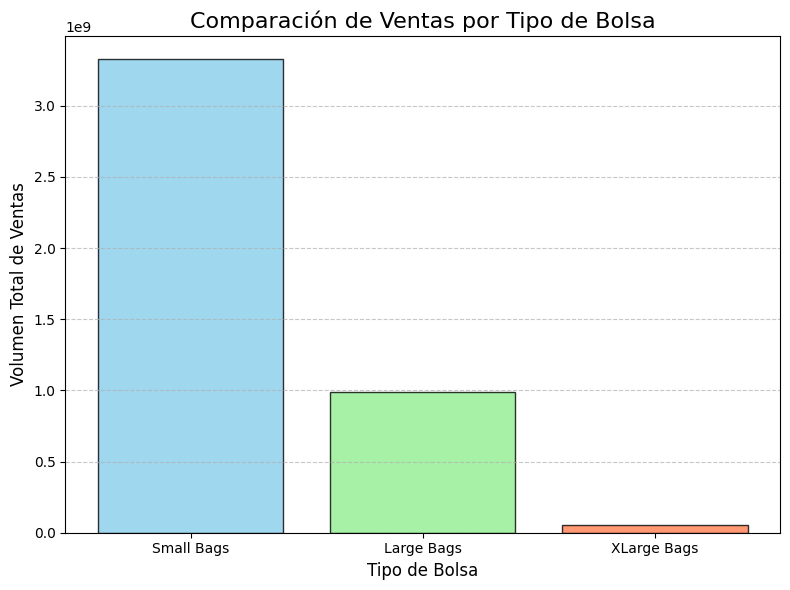

In [98]:
bolsas_totales = {
    'Small Bags': df['Small Bags'].sum(),
    'Large Bags': df['Large Bags'].sum(),
    'XLarge Bags': df['XLarge Bags'].sum()
}

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(bolsas_totales.keys(), bolsas_totales.values(), color=['skyblue', 'lightgreen', 'coral'], alpha=0.8, edgecolor='black')
plt.title('Comparación de Ventas por Tipo de Bolsa', fontsize=16)
plt.xlabel('Tipo de Bolsa', fontsize=12)
plt.ylabel('Volumen Total de Ventas', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

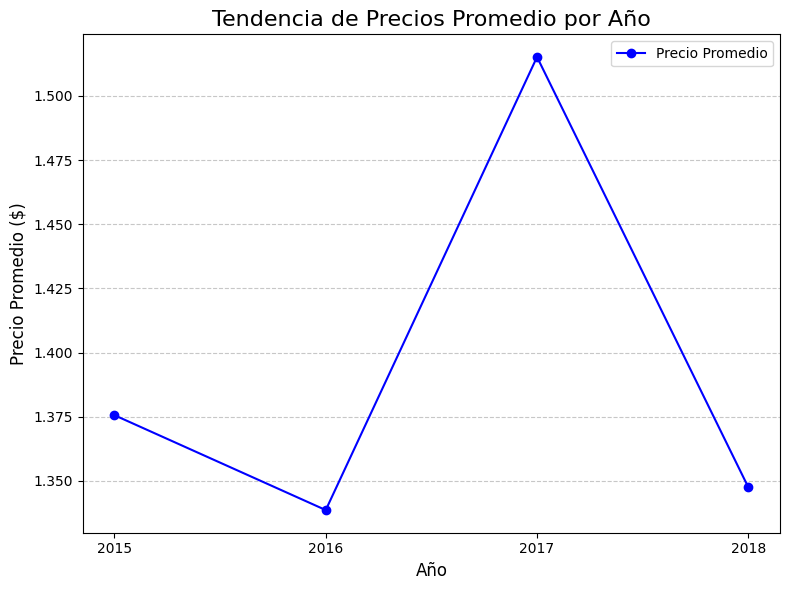

In [99]:
promedio_precio_por_año = df.groupby('year')['AveragePrice'].mean()

# Crear el gráfico de líneas
plt.figure(figsize=(8, 6))
plt.plot(promedio_precio_por_año.index, promedio_precio_por_año.values, marker='o', linestyle='-', color='blue', label='Precio Promedio')

# Personalización del gráfico
plt.title('Tendencia de Precios Promedio por Año', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Precio Promedio ($)', fontsize=12)
plt.xticks(promedio_precio_por_año.index, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(fontsize=10)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

<ipython-input-100-0ad9222d24f2>:4: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  cohortes_trimestrales = df.groupby(pd.Grouper(key='Date', freq='Q')).agg({


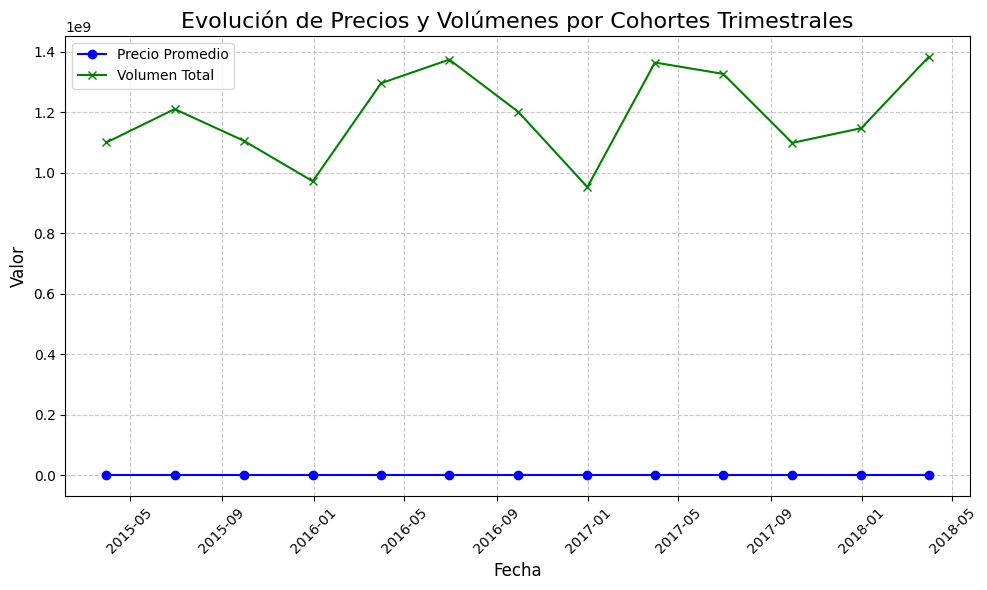

In [100]:
df['Date'] = pd.to_datetime(df['Date'])

# Agrupar por trimestre y calcular el promedio de AveragePrice y la suma de Total Volume
cohortes_trimestrales = df.groupby(pd.Grouper(key='Date', freq='Q')).agg({
    'AveragePrice': 'mean',    # Promedio de AveragePrice por trimestre
    'Total Volume': 'sum'      # Suma de Total Volume por trimestre
}).reset_index()

# Crear el gráfico de líneas para visualizar la evolución de precios y volúmenes
plt.figure(figsize=(10, 6))

# Gráfico de precios promedio por trimestre
plt.plot(cohortes_trimestrales['Date'], cohortes_trimestrales['AveragePrice'], marker='o', linestyle='-', color='blue', label='Precio Promedio')

# Gráfico de volumen total por trimestre
plt.plot(cohortes_trimestrales['Date'], cohortes_trimestrales['Total Volume'], marker='x', linestyle='-', color='green', label='Volumen Total')

# Personalización del gráfico
plt.title('Evolución de Precios y Volúmenes por Cohortes Trimestrales', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Valor', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

<ipython-input-101-93222077c5a9>:4: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  cohortes_regiones = df.groupby([pd.Grouper(key='Date', freq='Q'), 'region']).agg({
<ipython-input-101-93222077c5a9>:39: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


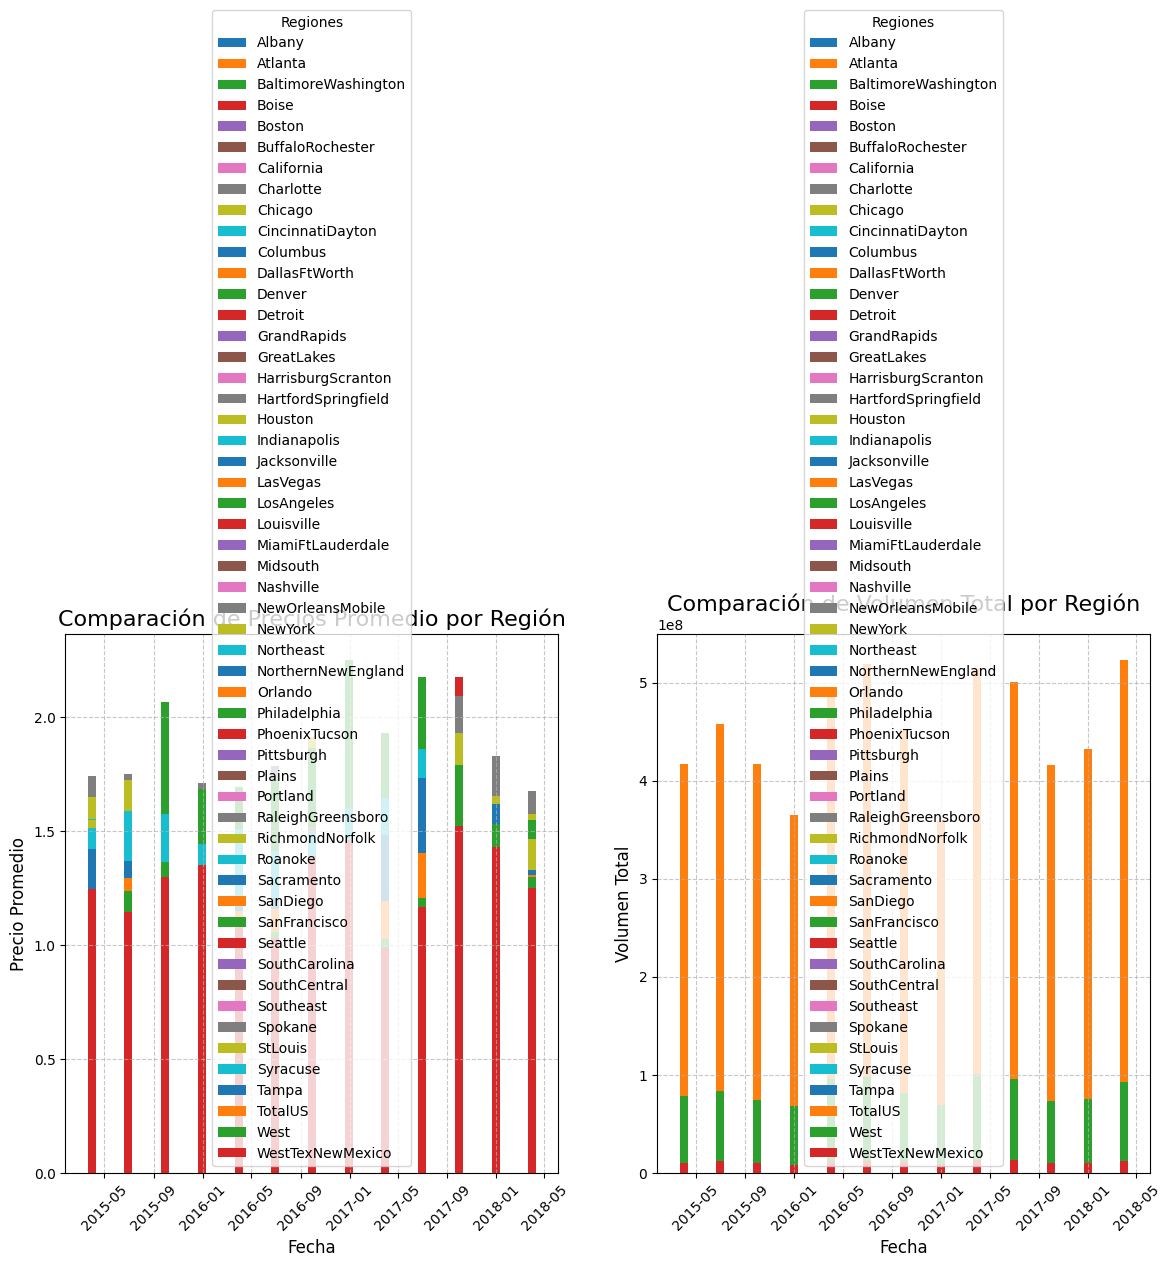

In [101]:
df['Date'] = pd.to_datetime(df['Date'])

# Agrupar los datos por región y fecha, calculando el promedio de AveragePrice y la suma de Total Volume
cohortes_regiones = df.groupby([pd.Grouper(key='Date', freq='Q'), 'region']).agg({
    'AveragePrice': 'mean',   # Promedio de AveragePrice por cohorte
    'Total Volume': 'sum'     # Suma de Total Volume por cohorte
}).reset_index()

# Crear el gráfico de barras para comparar precios promedio por región
plt.figure(figsize=(14, 7))

# Gráfico de barras de precios promedio por región
plt.subplot(1, 2, 1)
for region in cohortes_regiones['region'].unique():
    region_data = cohortes_regiones[cohortes_regiones['region'] == region]
    plt.bar(region_data['Date'], region_data['AveragePrice'], label=region, width=20)

plt.title('Comparación de Precios Promedio por Región', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Precio Promedio', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Regiones")
plt.grid(True, linestyle='--', alpha=0.7)

# Gráfico de barras de volumen total por región
plt.subplot(1, 2, 2)
for region in cohortes_regiones['region'].unique():
    region_data = cohortes_regiones[cohortes_regiones['region'] == region]
    plt.bar(region_data['Date'], region_data['Total Volume'], label=region, width=20)

plt.title('Comparación de Volumen Total por Región', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Volumen Total', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Regiones")
plt.grid(True, linestyle='--', alpha=0.7)

# Ajuste de layout para que todo sea visible
plt.tight_layout()
plt.show()

In [102]:
df['Date'] = pd.to_datetime(df['Date'])

# Agrupar los datos por tipo de bolsa (Small Bags, Large Bags, XLarge Bags, Total Bags) y fecha (trimestral)
cohortes_bolsas = df.groupby([pd.Grouper(key='Date', freq='Q')])['Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags'].sum().reset_index()

# Crear el gráfico de líneas para mostrar la evolución de las ventas por tipo de bolsa
plt.figure(figsize=(14, 7))

# Graficar las ventas por cada tipo de bolsa
plt.plot(cohortes_bolsas['Date'], cohortes_bolsas['Total Bags'], label='Total Bags', marker='o', linestyle='-', color='b')
plt.plot(cohortes_bolsas['Date'], cohortes_bolsas['Small Bags'], label='Small Bags', marker='o', linestyle='-', color='g')
plt.plot(cohortes_bolsas['Date'], cohortes_bolsas['Large Bags'], label='Large Bags', marker='o', linestyle='-', color='r')
plt.plot(cohortes_bolsas['Date'], cohortes_bolsas['XLarge Bags'], label='XLarge Bags', marker='o', linestyle='-', color='c')

# Añadir título y etiquetas
plt.title('Evolución de Volumen de Ventas por Tipo de Bolsa', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Volumen de Ventas', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Tipos de Bolsa")
plt.grid(True, linestyle='--', alpha=0.7)

# Ajuste de layout para que todo sea visible
plt.tight_layout()
plt.show()

<ipython-input-102-0117c6a68c85>:4: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  cohortes_bolsas = df.groupby([pd.Grouper(key='Date', freq='Q')])['Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags'].sum().reset_index()


ValueError: Cannot subset columns with a tuple with more than one element. Use a list instead.